In [1]:
import pandas as pd
import numpy as np
import arkadia
import math
import matplotlib.pyplot as plt
from front_read.loader import *
from Shaping import yearly_shaping as ys
import pdb


# Quarter to year ratios

In [2]:
#Q2Y 2020
#Load data from Mesap 
# The rolling timeseries will be queried for these days (=rows in the resulting data frame)
start_q_2020 = pd.Timestamp('2018-06-01').tz_localize('Europe/Berlin') #start trading period
end_q_2020 = pd.Timestamp('2019-12-31').tz_localize('Europe/Berlin') #end trading period
eex_strom_germany_q_2020 = load_data('eex-strom-germany-phelixfuture-base', start_q_2020, end_q_2020, fyears=1, fquarters=8, fmonths=0)
settlementYear = 2020 #Pick the year after the "end"-year in the previous cell.  
Q2Y_2020 = ys.quarter2year(eex_strom_germany_q_2020,settlementYear)
Q2Y_2020[['Q1_2year','Q2_2year','Q3_2year','Q4_2year']].mean()

Q1_2year    1.061852
Q2_2year    0.909626
Q3_2year    0.945676
Q4_2year    1.082526
dtype: float64

In [3]:
#Q2Y test 2021
#Load data from Mesap 
# The rolling timeseries will be queried for these days (=rows in the resulting data frame)
start_q_2021 = pd.Timestamp('2019-06-01').tz_localize('Europe/Berlin') #start trading period
end_q_2021 = pd.Timestamp('2020-12-31').tz_localize('Europe/Berlin') #end trading period
eex_strom_germany_q_2021 = load_data('eex-strom-germany-phelixfuture-base', start_q_2021, end_q_2021, fyears=1, fquarters=8, fmonths=0)
settlementYear = 2021 #Pick the year after the "end"-year in the previous cell.  
Q2Y_2021 = ys.quarter2year(eex_strom_germany_q_2021,settlementYear)
Q2Y_2021[['Q1_2year','Q2_2year','Q3_2year','Q4_2year']].mean()

Q1_2year    1.038353
Q2_2year    0.902827
Q3_2year    0.952487
Q4_2year    1.106080
dtype: float64

In [4]:
#Average Q2Y ratios (Analyst will make decision on which year to use in shape. Will manually change year)
Q2Y_weights_month = pd.DataFrame(data=[Q2Y_2020['Q1_2year'].mean(),Q2Y_2020['Q1_2year'].mean(),Q2Y_2020['Q1_2year'].mean(),
                                 Q2Y_2020['Q2_2year'].mean(),Q2Y_2020['Q2_2year'].mean(),Q2Y_2020['Q2_2year'].mean(),                                 
                                 Q2Y_2020['Q3_2year'].mean(),Q2Y_2020['Q3_2year'].mean(),Q2Y_2020['Q3_2year'].mean(),
                                 Q2Y_2020['Q4_2year'].mean(),Q2Y_2020['Q4_2year'].mean(),Q2Y_2020['Q4_2year'].mean()], 
                                 columns=['weights'],
                                 index=[['January','February','March','April','May','June',
                                        'July','August','September','October','November','December']]) 
Q2Y_weights = pd.DataFrame(data=[Q2Y_2020['Q1_2year'].mean(),
                                 Q2Y_2020['Q2_2year'].mean(),                                 
                                 Q2Y_2020['Q3_2year'].mean(),
                                 Q2Y_2020['Q4_2year'].mean()], 
                                 columns=['weights'],
                                 index=[['Q1','Q2','Q3','Q4']]) 
Q2Y_weights.head()

,weights
Q1,1.061852
Q2,0.909626
Q3,0.945676
Q4,1.082526


# Month to quarter ratios

In [5]:
#Load data from Mesap and calculate ratios for year 2019
# The rolling timeseries will be queried for these days (=rows in the resulting data frame)
settlement_year_m = 2019
start_m_2019 = pd.Timestamp('2018-05-01').tz_localize('Europe/Berlin') #start trading period
end_m_2019 = pd.Timestamp('2019-09-30').tz_localize('Europe/Berlin') #end trading period
eex_strom_germany_m_2019 = load_data('eex-strom-germany-phelixfuture-base', start_m_2019, end_m_2019, fyears=0, fquarters=8, fmonths=8)
M2Q_Q1_2019,M2Q_Q2_2019,M2Q_Q3_2019,M2Q_Q4_2019 = ys.month2quarter(eex_strom_germany_m_2019,settlement_year_m)

In [6]:
#Load data from Mesap and calculate ratios for year 2018
# The rolling timeseries will be queried for these days (=rows in the resulting data frame)
settlement_year_m = 2018
start_m_2018 = pd.Timestamp('2017-05-01').tz_localize('Europe/Berlin') #start trading period
end_m_2018 = pd.Timestamp('2018-09-30').tz_localize('Europe/Berlin') #end trading period
eex_strom_germany_m_2018 = load_data('eex-strom-germany-phelixfuture-base', start_m_2018, end_m_2018, fyears=0, fquarters=8, fmonths=8)
M2Q_Q1_2018,M2Q_Q2_2018,M2Q_Q3_2018,M2Q_Q4_2018 = ys.month2quarter(eex_strom_germany_m_2018,settlement_year_m)


In [7]:
#Load data from Mesap and calculate ratios for year 2020
# The rolling timeseries will be queried for these days (=rows in the resulting data frame)
settlement_year_m = 2020
start_m_2020 = pd.Timestamp('2019-05-01').tz_localize('Europe/Berlin') #start trading period
end_m_2020 = pd.Timestamp('2020-09-30').tz_localize('Europe/Berlin') #end trading period
eex_strom_germany_m_2020 = load_data('eex-strom-germany-phelixfuture-base', start_m_2020, end_m_2020, fyears=0, fquarters=8, fmonths=8)
M2Q_Q1_2020,M2Q_Q2_2020,M2Q_Q3_2020,M2Q_Q4_2020 = ys.month2quarter(eex_strom_germany_m_2020,settlement_year_m)

In [8]:
#Load data from Mesap and calculate ratios for year 2020
# The rolling timeseries will be queried for these days (=rows in the resulting data frame)
settlement_year_m = 2021
start_m_2021 = pd.Timestamp('2020-05-01').tz_localize('Europe/Berlin') #start trading period
end_m_2021 = pd.Timestamp('2021-09-30').tz_localize('Europe/Berlin') #end trading period
eex_strom_germany_m_2021 = load_data('eex-strom-germany-phelixfuture-base', start_m_2021, end_m_2021, fyears=0, fquarters=8, fmonths=8)
M2Q_Q1_2021,M2Q_Q2_2021,M2Q_Q3_2021,M2Q_Q4_2021 = ys.month2quarter(eex_strom_germany_m_2021,settlement_year_m)


In [9]:
#Average M2Q ratios based on 2019 data

M2Q_weights_2019 = pd.DataFrame(data=[M2Q_Q1_2019['Jan_to_Q1'].mean(),M2Q_Q1_2019['Feb_to_Q1'].mean(),M2Q_Q1_2019['Mar_to_Q1'].mean(),
                                M2Q_Q2_2019['Apr_to_Q2'].mean(),M2Q_Q2_2019['May_to_Q2'].mean(),M2Q_Q2_2019['Jun_to_Q2'].mean(),
                                M2Q_Q3_2019['Jul_to_Q3'].mean(),M2Q_Q3_2019['Aug_to_Q3'].mean(),M2Q_Q3_2019['Sep_to_Q3'].mean(),
                                M2Q_Q4_2019['Oct_to_Q4'].mean(),M2Q_Q4_2019['Nov_to_Q4'].mean(),M2Q_Q4_2019['Dec_to_Q4'].mean()],
                                columns=['weights_2019'],
                                index=[['January','February','March','April','May','June',
                                        'July','August','September','October','November','December']]) 





In [10]:
#Average M2Q ratios based on 2018 data

M2Q_weights_2018 = pd.DataFrame(data=[M2Q_Q1_2018['Jan_to_Q1'].mean(),M2Q_Q1_2018['Feb_to_Q1'].mean(),M2Q_Q1_2018['Mar_to_Q1'].mean(),
                                M2Q_Q2_2018['Apr_to_Q2'].mean(),M2Q_Q2_2018['May_to_Q2'].mean(),M2Q_Q2_2018['Jun_to_Q2'].mean(),
                                M2Q_Q3_2018['Jul_to_Q3'].mean(),M2Q_Q3_2018['Aug_to_Q3'].mean(),M2Q_Q3_2018['Sep_to_Q3'].mean(),
                                M2Q_Q4_2018['Oct_to_Q4'].mean(),M2Q_Q4_2018['Nov_to_Q4'].mean(),M2Q_Q4_2018['Dec_to_Q4'].mean()],
                                columns=['weights_2018'],
                                index=[['January','February','March','April','May','June',
                                        'July','August','September','October','November','December']]) 






In [11]:
#Average M2Q ratios based on 2020 data

M2Q_weights_2020 = pd.DataFrame(data=[M2Q_Q1_2020['Jan_to_Q1'].mean(),M2Q_Q1_2020['Feb_to_Q1'].mean(),M2Q_Q1_2020['Mar_to_Q1'].mean(),
                                M2Q_Q2_2020['Apr_to_Q2'].mean(),M2Q_Q2_2020['May_to_Q2'].mean(),M2Q_Q2_2020['Jun_to_Q2'].mean(),
                                M2Q_Q3_2020['Jul_to_Q3'].mean(),M2Q_Q3_2020['Aug_to_Q3'].mean(),M2Q_Q3_2020['Sep_to_Q3'].mean(),
                                M2Q_Q4_2020['Oct_to_Q4'].mean(),M2Q_Q4_2020['Nov_to_Q4'].mean(),M2Q_Q4_2020['Dec_to_Q4'].mean()],
                                columns=['weights_2020'],
                                index=[['January','February','March','April','May','June',
                                        'July','August','September','October','November','December']]) 



In [12]:
#Average M2Q ratios based on 2021 data

M2Q_weights_2021 = pd.DataFrame(data=[M2Q_Q1_2021['Jan_to_Q1'].mean(),M2Q_Q1_2021['Feb_to_Q1'].mean(),M2Q_Q1_2021['Mar_to_Q1'].mean(),
                                M2Q_Q2_2021['Apr_to_Q2'].mean(),M2Q_Q2_2021['May_to_Q2'].mean(),M2Q_Q2_2021['Jun_to_Q2'].mean(),
                                M2Q_Q3_2021['Jul_to_Q3'].mean(),M2Q_Q3_2021['Aug_to_Q3'].mean(),M2Q_Q3_2021['Sep_to_Q3'].mean(),
                                M2Q_Q4_2021['Oct_to_Q4'].mean(),M2Q_Q4_2021['Nov_to_Q4'].mean(),M2Q_Q4_2021['Dec_to_Q4'].mean()],
                                columns=['weights_2021'],
                                index=[['January','February','March','April','May','June',
                                        'July','August','September','October','November','December']]) 



<AxesSubplot:title={'center':'M2Q weights estimated on different years'}>

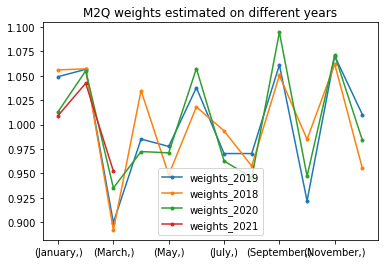

In [13]:
#Some plotting of the different M2Q weights to support analyst in decision
pd.concat([pd.concat([pd.concat([M2Q_weights_2019,M2Q_weights_2018],axis=1),M2Q_weights_2020],axis=1),M2Q_weights_2021],axis=1).plot(title='M2Q weights estimated on different years',style='.-')


# Month to year ratios

In [14]:
#Analyst decides to combine the M2Q weights from 2019 (for Q1,Q2,Q3) and 2020 (for Q4). --> best forecast of future weights
M2Q_weights = pd.DataFrame(data = [M2Q_Q1_2019['Jan_to_Q1'].mean(),M2Q_Q1_2019['Feb_to_Q1'].mean(),M2Q_Q1_2019['Mar_to_Q1'].mean(),
                                M2Q_Q2_2019['Apr_to_Q2'].mean(),M2Q_Q2_2019['May_to_Q2'].mean(),M2Q_Q2_2019['Jun_to_Q2'].mean(),
                                M2Q_Q3_2019['Jul_to_Q3'].mean(),M2Q_Q3_2019['Aug_to_Q3'].mean(),M2Q_Q3_2019['Sep_to_Q3'].mean(),
                                M2Q_Q4_2020['Oct_to_Q4'].mean(),M2Q_Q4_2020['Nov_to_Q4'].mean(),M2Q_Q4_2020['Dec_to_Q4'].mean()],
                                columns=['weights_final'],
                                index=[['January','February','March','April','May','June',
                                        'July','August','September','October','November','December']])
M2Q_weights #These weoghts are not normalized

,weights_final
January,1.049098
February,1.056586
March,0.899647
April,0.985227
May,0.977682
June,1.037849
July,0.970402
August,0.970408
September,1.061104
October,0.947241


In [15]:
#Building normalized M2Y weights for non-leap year and leap year (by combining M2QxQ2Y = M2Y)
#Normalization means that the weighted average = 1 (weights are numHours in month).
#Weights will be rolled out as monthly weights for future shaping time period. 
#nonleapYear weights for non-leap-years, and leapYear weights for leap years.
M2Y_norm = ys.month2year_norm(Q2Y_weights,M2Q_weights) #this function performs normalization and calculates M2Y-weights
#M2Y_norm.plot(title='Final M2Y weights',style='.-')
M2Y_norm


,nonleapYear,leapYear
January,1.114180,1.113299
February,1.122132,1.121244
March,0.955457,0.954701
April,0.896336,0.896184
May,0.889472,0.889321
June,0.944210,0.944050
July,0.917859,0.917704
August,0.917865,0.917710
September,1.003651,1.003480
October,1.025611,1.025437


<AxesSubplot:>

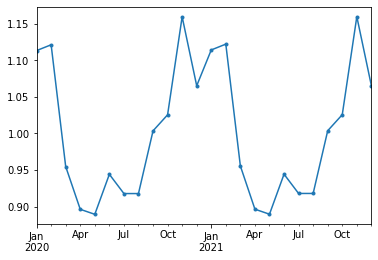

In [16]:
#Roll out weights on a forward looking term structure (e.g. 2020-01-01 to 2021-12-31)
fwdShape = pd.DataFrame(data=[],columns=['Shape'],index=pd.date_range(start='2020-01-01 00:00:00', end='2021-12-31 23:00:00', freq='M'))
fwdShape['Year'] = fwdShape.index.year
fwdShape['Month'] = fwdShape.index.month
fwdShape['Hour'] = fwdShape.index.hour
fwdShape['Weekday'] = fwdShape.index.weekday

for T in fwdShape.index:
    if pd.Timestamp(T.year, 1, 1).is_leap_year:
        fwdShape.loc[T, 'Shape'] = M2Y_norm.loc[T.month_name(),'leapYear'].values
    else:
        fwdShape.loc[T, 'Shape'] = M2Y_norm.loc[T.month_name(),'nonleapYear'].values
            

fwdShape['Shape'].plot(style='.-')


In [98]:
#The hourly structure (by Owen) can now be scaled to the rolled out monthly weights (with affine transformation)
#--> final hourly shape! 

